# Projet 1 - Classification 

* **Authors:** Mouna Dhaouadi / Kacem Khaled
* **Class:** IFT6285
* **Term:** Fall 2021
* **Professor** Dr. Philippe Langlais

### Connecting to drive 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
kacemdir = "/content/drive/My Drive/1-Polymtl/IFT6285"
mounadir=  "/content/drive/My Drive/IFT6285"
os.chdir(kacemdir)
!ls

'=4.0.0'			    Models
'Copy of text-transformers.ipynb'  'Old - Projet1-Classification - task2.ipynb'
 Data				    Outputs
 dataframes.ipynb		    plots
'devoir1 (1).ipynb'		    Projet1-Classification-task1-CoLA.ipynb
 devoir1.ipynb			    Projet1-Classification-task2.ipynb
 Files				    TP2.ipynb
 Links.gdoc			    wandb


In [3]:
! pip install --quiet datasets

In [4]:
# ! pip install wandb


In [5]:
# import wandb

# wandb.init(project="NLP-Project-1-Colab", entity="kacem")


In [6]:
MRPC_data_folder = 'Data/MRPC/'
MRPC_models_folder  = 'Models/MRPC/'
MRPC_output_folder = 'Outputs/MRPC/'
MRPC_plots_folder = 'plots/MRPC/'

## Task 2 : MRPC

MRPC dataset in [NLP Viewer](https://huggingface.co/nlp/viewer/?dataset=glue&config=mrpc)

### Step1 : Download and get to know the data 

In [7]:
#  using datasets lib
import datasets
MRPC = datasets.load_dataset("glue", "mrpc")
print(MRPC)

Reusing dataset glue (/root/.cache/huggingface/datasets/glue/mrpc/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})


#### Train set

In [8]:
import pandas as pd
from statistics import mean

In [9]:
MRPC_train = pd.DataFrame(MRPC['train'])
MRPC_train
  # {
  #   "sentence1":"string"
  #   "sentence2":"string"
  #   "label":[
  #           0:"not_equivalent"
  #           1:"equivalent"
  #           ]
  #   "idx":"int32"
  # }

,sentence1,sentence2,label,idx
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1,0
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0,1
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1,2
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0,3
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1,4
...,...,...,...,...
3663,""" At this point , Mr. Brando announced : ' Som...","Brando said that "" somebody ought to put a bul...",1,4071
3664,"Martin , 58 , will be freed today after servin...",Martin served two thirds of a five-year senten...,0,4072
3665,""" We have concluded that the outlook for price...","In a statement , the ECB said the outlook for ...",1,4073
3666,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...,1,4074


In [10]:
print(MRPC_train['label'].value_counts())

1    2474
0    1194
Name: label, dtype: int64


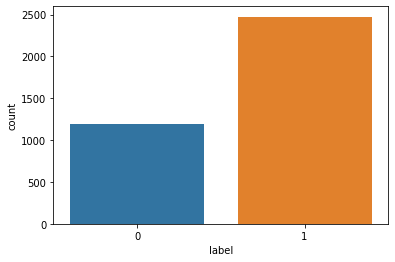

In [11]:
from seaborn import countplot
countplot(x='label', data = MRPC_train )
# "label":[0:"not_equivalent", 1:"equivalent"]

In [12]:
MRPC_train_0 = MRPC_train[MRPC_train['label']==0]
MRPC_train_0

,sentence1,sentence2,label,idx
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0,1
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0,3
6,"The Nasdaq had a weekly gain of 17.27 , or 1.2...",The tech-laced Nasdaq Composite .IXIC rallied ...,0,6
8,"That compared with $ 35.18 million , or 24 cen...",Earnings were affected by a non-recurring $ 8 ...,0,8
9,"Shares of Genentech , a much larger company wi...",Shares of Xoma fell 16 percent in early trade ...,0,10
...,...,...,...,...
3650,Mr McDevitt has been granted control of three ...,Mr McDevitt has been granted control of three ...,0,4058
3651,"In 2002 , Linksys overtook Cisco Systems as th...",Rolfe said Linksys overtook Cisco Systems last...,0,4059
3652,"RT Jones analyst Juli Niemann said Grant was ""...","He has a very good reputation , "" RT Jones ana...",0,4060
3664,"Martin , 58 , will be freed today after servin...",Martin served two thirds of a five-year senten...,0,4072


In [13]:
MRPC_train_1 = MRPC_train[MRPC_train['label']==1]
MRPC_train_1

,sentence1,sentence2,label,idx
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1,0
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1,2
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1,4
5,Revenue in the first quarter of the year dropp...,With the scandal hanging over Stewart 's compa...,1,5
7,The DVD-CCA then appealed to the state Supreme...,The DVD CCA appealed that decision to the U.S....,1,7
...,...,...,...,...
3661,Knox County Health Department is following nat...,The health department spokesperson added the d...,1,4069
3662,The new rules will allow a single company to o...,The changed national ownership limit allows a ...,1,4070
3663,""" At this point , Mr. Brando announced : ' Som...","Brando said that "" somebody ought to put a bul...",1,4071
3665,""" We have concluded that the outlook for price...","In a statement , the ECB said the outlook for ...",1,4073


In [14]:
MRPC_train_pairs =  list(zip(MRPC['train']['sentence1'],MRPC['train']['sentence2']))
train_sentences_list_lengthes =  [len ( sent.split() )  for sent in MRPC_train["sentence1"]] + [len ( sent.split() )  for sent in MRPC_train["sentence2"]]
print(MRPC_train_pairs)
train_max_len =  max( train_sentences_list_lengthes  ) 
train_min_len =  min( train_sentences_list_lengthes )
train_avg_len = mean ( train_sentences_list_lengthes  )

train_max_len, train_min_len, train_avg_len

[('Amrozi accused his brother , whom he called " the witness " , of deliberately distorting his evidence .', 'Referring to him as only " the witness " , Amrozi accused his brother of deliberately distorting his evidence .'), ("Yucaipa owned Dominick 's before selling the chain to Safeway in 1998 for $ 2.5 billion .", "Yucaipa bought Dominick 's in 1995 for $ 693 million and sold it to Safeway for $ 1.8 billion in 1998 ."), ('They had published an advertisement on the Internet on June 10 , offering the cargo for sale , he added .', "On June 10 , the ship 's owners had published an advertisement on the Internet , offering the explosives for sale ."), ('Around 0335 GMT , Tab shares were up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .', 'Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 .'), ('The stock rose $ 2.11 , or about 11 percent , to close Friday at $ 21.51 on the New York Stock Exchange .', 'PG & E Corp. shares j

(42, 7, 21.94465648854962)

In [15]:
train_not_equiv_sentences_list= []
train_not_equiv_sentences_list_lengthes=[]
for sent1,sent2   in zip(MRPC_train_0["sentence1"],MRPC_train_0["sentence2"]):
      train_not_equiv_sentences_list+=([sent1,sent2]) 


for sent1,sent2   in zip(MRPC_train_0["sentence1"],MRPC_train_0["sentence2"]):
    train_not_equiv_sentences_list_lengthes+=([len(sent1.split()),len(sent2.split())]) 
# even index : sentence 1 --> train_not_equiv_sentences_list[::2]
# odd index : sentence 2 --> train_not_equiv_sentences_list[1::2]

train_not_equiv_max_len =  max(train_not_equiv_sentences_list_lengthes ) 
print('max: ',train_not_equiv_max_len)
train_not_equiv_min_len = min(train_not_equiv_sentences_list_lengthes )
print('min: ',train_not_equiv_min_len)
train_not_equiv_avg_len = mean(train_not_equiv_sentences_list_lengthes  )
print('avg: ', train_not_equiv_avg_len)


max:  35
min:  8
avg:  20.67462311557789


In [16]:
train_equiv_sentences_list= []
train_equiv_sentences_list_lengthes=[]
for sent1,sent2   in zip(MRPC_train_1["sentence1"],MRPC_train_1["sentence2"]):
      train_equiv_sentences_list+=([sent1,sent2]) 

for sent1,sent2   in zip(MRPC_train_1["sentence1"],MRPC_train_1["sentence2"]):
    train_equiv_sentences_list_lengthes+=([len(sent1.split()),len(sent2.split())]) 
# even index : sentence 1 --> train_equiv_sentences_list[::2]
# odd index : sentence 2 --> train__equiv_sentences_list[1::2]

train_equiv_max_len =  max(train_equiv_sentences_list_lengthes ) 
print('max: ',train_equiv_max_len)
train_equiv_min_len = min(train_equiv_sentences_list_lengthes )
print('min: ',train_equiv_min_len)
train_equiv_avg_len = mean(train_equiv_sentences_list_lengthes  )
print('avg: ', train_equiv_avg_len)


max:  42
min:  7
avg:  22.557599029911074


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


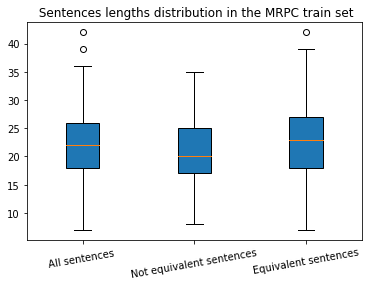

In [17]:
import matplotlib.pyplot as plt

train_data_for_boxplots = [ train_sentences_list_lengthes, train_not_equiv_sentences_list_lengthes , train_equiv_sentences_list_lengthes ]
fig_boxplot, ax_boxplot = plt.subplots()
ax_boxplot.set_title(' Sentences lengths distribution in the MRPC train set')
ax_boxplot.boxplot(train_data_for_boxplots, patch_artist = True)
plt.xticks([1, 2, 3], ["All sentences ", "Not equivalent sentences", "Equivalent sentences"], rotation=10)
plt.show()

#### Dev set

In [18]:
MRPC_val = pd.DataFrame(MRPC['validation'])
MRPC_val

,sentence1,sentence2,label,idx
0,He said the foodservice pie business doesn 't ...,""" The foodservice pie business does not fit ou...",1,9
1,Magnarelli said Racicot hated the Iraqi regime...,"His wife said he was "" 100 percent behind Geor...",0,18
2,"The dollar was at 116.92 yen against the yen ,...","The dollar was at 116.78 yen JPY = , virtually...",0,25
3,The AFL-CIO is waiting until October to decide...,The AFL-CIO announced Wednesday that it will d...,1,32
4,No dates have been set for the civil or the cr...,No dates have been set for the criminal or civ...,0,33
...,...,...,...,...
403,Their contract will expire at 12 : 01 a.m. Wed...,""" It has outraged the membership , "" said Rian...",0,4023
404,But plaque volume increased by 2.7 percent in ...,The volume of plaque in Pravachol patients ' a...,1,4028
405,"Today in the US , the book - kept under wraps ...","Tomorrow the book , kept under wraps by G. P. ...",1,4040
406,The S & P / TSX composite rose 87.74 points on...,"On the week , the Dow Jones industrial average...",0,4049


In [19]:
MRPC_test = pd.DataFrame(MRPC['test'])
MRPC_test

,sentence1,sentence2,label,idx
0,"PCCW 's chief operating officer , Mike Butcher...",Current Chief Operating Officer Mike Butcher a...,1,0
1,The world 's two largest automakers said their...,Domestic sales at both GM and No. 2 Ford Motor...,1,1
2,According to the federal Centers for Disease C...,The Centers for Disease Control and Prevention...,1,2
3,A tropical storm rapidly developed in the Gulf...,A tropical storm rapidly developed in the Gulf...,0,3
4,The company didn 't detail the costs of the re...,But company officials expect the costs of the ...,0,4
...,...,...,...,...
1720,"After Hughes refused to rehire Hernandez , he ...",Hernandez filed an Equal Employment Opportunit...,0,1720
1721,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...,0,1721
1722,Bethany Hamilton remained in stable condition ...,"Bethany , who remained in stable condition aft...",0,1722
1723,"Last week the power station ’ s US owners , AE...","The news comes after Drax 's American owner , ...",1,1723


In [20]:
print(MRPC_val['label'].value_counts())
print(MRPC_test['label'].value_counts())

1    279
0    129
Name: label, dtype: int64
1    1147
0     578
Name: label, dtype: int64


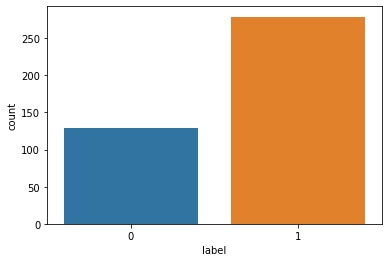

In [21]:
from seaborn import countplot
countplot(x='label', data = MRPC_val )

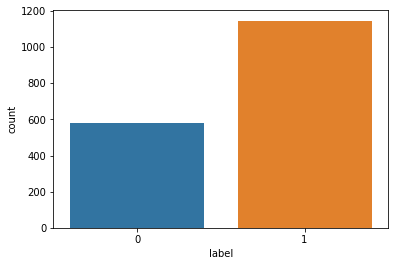

In [22]:
countplot(x='label', data = MRPC_test )

In [23]:
MRPC_val_0 = MRPC_val[MRPC_val['label']==0]
MRPC_val_0

,sentence1,sentence2,label,idx
1,Magnarelli said Racicot hated the Iraqi regime...,"His wife said he was "" 100 percent behind Geor...",0,18
2,"The dollar was at 116.92 yen against the yen ,...","The dollar was at 116.78 yen JPY = , virtually...",0,25
4,No dates have been set for the civil or the cr...,No dates have been set for the criminal or civ...,0,33
6,While dioxin levels in the environment were up...,The Institute said dioxin levels in the enviro...,0,54
11,""" Sanitation is poor ... there could be typhoi...",""" Sanitation is poor , drinking water is gener...",0,83
...,...,...,...,...
385,"In the United States , heart attacks kill abou...","In the United States , heart attacks kill abou...",0,3775
387,""" It 's a major victory for Maine , and it 's ...",The Maine program could be a model for other s...,0,3783
400,The broader Standard & Poor 's 500 Index .SPX ...,The technology-laced Nasdaq Composite Index < ...,0,3998
403,Their contract will expire at 12 : 01 a.m. Wed...,""" It has outraged the membership , "" said Rian...",0,4023


In [24]:
MRPC_val_1 = MRPC_val[MRPC_val['label']==1]
MRPC_val_1

,sentence1,sentence2,label,idx
0,He said the foodservice pie business doesn 't ...,""" The foodservice pie business does not fit ou...",1,9
3,The AFL-CIO is waiting until October to decide...,The AFL-CIO announced Wednesday that it will d...,1,32
5,Wal-Mart said it would check all of its millio...,It has also said it would review all of its do...,1,50
7,This integrates with Rational PurifyPlus and a...,IBM said the Rational products were also integ...,1,55
8,The top rate will go to 4.45 percent for all r...,"For residents with incomes above $ 500,000 , t...",1,73
...,...,...,...,...
401,The company emphasized that McDonald 's USA do...,McDonald 's said in a statement that it does n...,1,4014
402,"Gregory Parseghian , a former investment banke...",Greg Parseghian was appointed the new chief ex...,1,4020
404,But plaque volume increased by 2.7 percent in ...,The volume of plaque in Pravachol patients ' a...,1,4028
405,"Today in the US , the book - kept under wraps ...","Tomorrow the book , kept under wraps by G. P. ...",1,4040


In [25]:

MRPC_val_pairs =  list(zip(MRPC['validation']['sentence1'],MRPC['validation']['sentence1']))
# test set



val_sentences_list_lengthes =  [len ( sent.split() )  for sent in MRPC_train["sentence1"]] + [len ( sent.split() )  for sent in MRPC_val["sentence2"]]

val_max_len =  max( val_sentences_list_lengthes  ) 
val_min_len =  min( val_sentences_list_lengthes )
val_avg_len = mean ( val_sentences_list_lengthes  )

val_max_len, val_min_len, val_avg_len

(39, 7, 21.918547595682043)

In [26]:
MRPC_test_pairs =  list(zip(MRPC['test']['sentence1'],MRPC['test']['sentence1']))
MRPC_test_pairs[:3]

[("PCCW 's chief operating officer , Mike Butcher , and Alex Arena , the chief financial officer , will report directly to Mr So .",
  "PCCW 's chief operating officer , Mike Butcher , and Alex Arena , the chief financial officer , will report directly to Mr So ."),
 ("The world 's two largest automakers said their U.S. sales declined more than predicted last month as a late summer sales frenzy caused more of an industry backlash than expected .",
  "The world 's two largest automakers said their U.S. sales declined more than predicted last month as a late summer sales frenzy caused more of an industry backlash than expected ."),
 ('According to the federal Centers for Disease Control and Prevention ( news - web sites ) , there were 19 reported cases of measles in the United States in 2002 .',
  'According to the federal Centers for Disease Control and Prevention ( news - web sites ) , there were 19 reported cases of measles in the United States in 2002 .')]

In [27]:
MRPC_test['label']

0       1
1       1
2       1
3       0
4       0
       ..
1720    0
1721    0
1722    0
1723    1
1724    1
Name: label, Length: 1725, dtype: int64

In [28]:
# dev_cola_wrong_sentences_list =  [sent for sent in dev_cola_data_wrong["Sentence"]]
# dev_cola_wrong_sentences_list_lengthes =  [len ( sent.split() )  for sent in dev_cola_data_wrong["Sentence"]]

# dev_cola_wrong_max_len = max(dev_cola_wrong_sentences_list_lengthes) 
# dev_cola_wrong_min_len = min(dev_cola_wrong_sentences_list_lengthes)

# dev_cola_wrong_avg_len = mean ( dev_cola_wrong_sentences_list_lengthes  )
# dev_cola_wrong_max_len, dev_cola_wrong_min_len, dev_cola_wrong_avg_len

In [245]:
# dev_cola_right_sentences_list =  [sent for sent in dev_cola_data_right["Sentence"]]
# dev_cola_right_sentences_list_lengthes =  [len ( sent.split() )  for sent in dev_cola_data_right["Sentence"]]

# dev_cola_right_max_len = max( dev_cola_right_sentences_list_lengthes ) 
# dev_cola_right_min_len = min( dev_cola_right_sentences_list_lengthes ) 
# dev_cola_right_avg_len = mean ( dev_cola_right_sentences_list_lengthes  )
# dev_cola_right_max_len, dev_cola_right_min_len, dev_cola_right_avg_len

In [246]:
# import matplotlib.pyplot as plt

# dev_data_for_boxplots = [ dev_cola_sentences_list_lengthes, dev_cola_wrong_sentences_list_lengthes, dev_cola_right_sentences_list_lengthes]
# fig_boxplot, ax_boxplot = plt.subplots()
# ax_boxplot.set_title(' Sentences lengths distribution in the Cola dev set')
# ax_boxplot.boxplot(dev_data_for_boxplots, patch_artist = True)
# plt.xticks([1, 2, 3], ["All sentences ", "Grammatically wrong sentences", "Grammatically right sentences"], rotation=10)
# plt.show()

In [29]:
pd.DataFrame( MRPC['train'])

,sentence1,sentence2,label,idx
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1,0
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0,1
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1,2
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0,3
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1,4
...,...,...,...,...
3663,""" At this point , Mr. Brando announced : ' Som...","Brando said that "" somebody ought to put a bul...",1,4071
3664,"Martin , 58 , will be freed today after servin...",Martin served two thirds of a five-year senten...,0,4072
3665,""" We have concluded that the outlook for price...","In a statement , the ECB said the outlook for ...",1,4073
3666,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...,1,4074


#### Figures for report

In [37]:
df_plot_train = pd.DataFrame( MRPC['train'])
df_plot_train['set'] = 'Train Set'

df_plot_dev = pd.DataFrame( MRPC['validation'])
df_plot_dev['set'] = 'Validation set'

df_plot_test = pd.DataFrame( MRPC['test'])
df_plot_test['set'] = 'Test set'

df_plot = df_plot_train.append(df_plot_dev)
df_plot = df_plot.append(df_plot_test)
df_plot['set'].value_counts()

Train Set         3668
Test set          1725
Validation set     408
Name: set, dtype: int64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


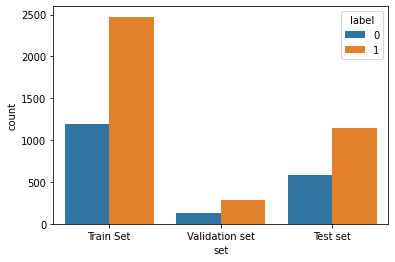

In [38]:
from seaborn import countplot
ax = countplot(x='set', hue='label', data = df_plot )
# =['0=unacceptable', '1=acceptable']
ax.figure.savefig(MRPC_plots_folder+'mrpc_data_distribution.png',transparent=True)
ax.figure.savefig(MRPC_plots_folder+'mrpc_data_distribution.eps',transparent=True)

In [39]:
print(MRPC_train['label'].value_counts())
print(MRPC_val['label'].value_counts())
print(MRPC_test['label'].value_counts())

1    2474
0    1194
Name: label, dtype: int64
1    279
0    129
Name: label, dtype: int64
1    1147
0     578
Name: label, dtype: int64


In [40]:
df_plot['length(sent1)'] = df_plot.apply(lambda row: len(row.sentence1.split()) , axis=1)
df_plot['length(sent2)'] = df_plot.apply(lambda row: len(row.sentence2.split()) , axis=1)
df_plot

,sentence1,sentence2,label,idx,set,length(sent1),length(sent2)
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1,0,Train Set,19,20
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0,1,Train Set,17,22
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1,2,Train Set,21,22
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0,3,Train Set,31,21
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1,4,Train Set,24,23
...,...,...,...,...,...,...,...
1720,"After Hughes refused to rehire Hernandez , he ...",Hernandez filed an Equal Employment Opportunit...,0,1720,Test set,16,11
1721,There are 103 Democrats in the Assembly and 47...,Democrats dominate the Assembly while Republic...,0,1721,Test set,11,10
1722,Bethany Hamilton remained in stable condition ...,"Bethany , who remained in stable condition aft...",0,1722,Test set,13,19
1723,"Last week the power station ’ s US owners , AE...","The news comes after Drax 's American owner , ...",1,1723,Test set,30,31


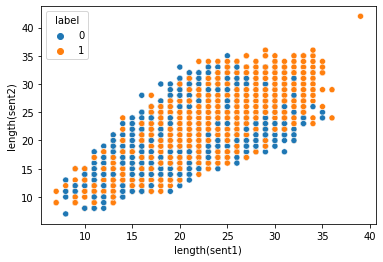

In [41]:
from seaborn import scatterplot
ax = scatterplot( x="length(sent1)", y="length(sent2)", hue='label', data = df_plot )

In [42]:
import plotly.express as px
df_plot["label"] = df_plot["label"].astype(str)
fig = px.scatter(df_plot, x="length(sent1)", y="length(sent2)", color="label",facet_col='set',opacity=0.3,
                 width=900)#
fig.show()

In [43]:
MRPC_train_pairs =  list(zip(MRPC['train']['sentence1'],MRPC['train']['sentence2']))
# train_sentences_list_lengthes =  [len ( sent.split() )  for sent in MRPC_train["sentence1"]] + [len ( sent.split() )  for sent in MRPC_train["sentence2"]]
train_sentences_list_lengthes =  [len (pair[0].split())  for pair in MRPC_train_pairs] 




In [83]:
# l1 = [ len(sent.split()) for sent in train_cola_sentences_list ]
# df1 = pd.DataFrame(l1 , columns=['sentence length'])
# df1['selection'] = 'All sentences'
# df1['set'] = 'Train set'


# l2 = [ len(sent.split()) for sent in train_cola_wrong_sentences_list ]
# df2 = pd.DataFrame(l2, columns=['sentence length'] )
# df2['selection'] = 'Grammatically wrong sentences'
# df2['set'] = 'Train set'

# l3 = [ len(sent.split()) for sent in train_cola_right_sentences_list ]
# df3 = pd.DataFrame(l3 , columns=['sentence length'] )
# df3['selection'] = 'Grammatically right sentences'
# df3['set'] = 'Train set'

# l4 = [ len(sent.split()) for sent in dev_cola_sentences_list ]
# df4 = pd.DataFrame(l4, columns=['sentence length'] )
# df4['selection'] = 'All sentences'
# df4['set'] = 'Dev set'

# l5 = [ len(sent.split()) for sent in dev_cola_wrong_sentences_list ]
# df5 = pd.DataFrame(l5 , columns=['sentence length'] )
# df5['selection'] = 'Grammatically wrong sentences'
# df5['set'] = 'Dev set'

# l6 = [ len(sent.split()) for sent in dev_cola_right_sentences_list ]
# df6 = pd.DataFrame(l6 , columns=['sentence length'] )
# df6['selection'] = 'Grammatically right sentences'
# df6['set'] = 'Dev set'

In [84]:
# df_all = None
# df_all = df1.append(df2).append(df3).append(df4).append(df5).append(df6)
# df_all

In [85]:
# import seaborn as sns
# ax = sns.boxplot(hue='selection', y='sentence length', x='set',data=df_all, palette='Set3')
# ax.figure.savefig(COLA_plots_folder+'cola_data_length_distribution.png',transparent=True)
# ax.figure.savefig(COLA_plots_folder+'cola_data_length_distribution.eps',transparent=True)

In [86]:
# g = sns.catplot(x="set", y="sentence length",
#                 hue="selection",
#                 data=df_all, kind="box",
#                 height=5, aspect=1);

In [87]:
# g = sns.catplot(x="selection", y="sentence length",
#                 col="set",
#                 data=df_all, kind="box",
#                 height=5, aspect=1.5);

### Step 2 : Use a reasonable baseline and evaluate it 

In [44]:
from sklearn.dummy import DummyClassifier
from joblib import dump, load
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score, accuracy_score, average_precision_score, f1_score
from sklearn.metrics import matthews_corrcoef

In [130]:
def evaluate(y,y_pred,title=''):
    print(f'{title}')
    print(classification_report(y,y_pred))
    cr = classification_report(y,y_pred,output_dict=True)
    acc = cr['accuracy'] 
    print('Accuracy score:\t', acc)
    # print('F1 score:\t', cr['1']['f1-score']) #['1']['f1-score']
    print('F1 score (c#1):\t', f1_score(y,y_pred)) #['1']['f1-score']
    # print('f1 score (class0)', f1_score(y_val, y_pred, pos_label=0))
    print('F1 score (avg):\t', cr['macro avg']['f1-score'])
    print('matthews_corrcoef:\t', matthews_corrcoef(y,y_pred))
    return cr



#### Dummy Classifier to start with

In [120]:
MRPC_models_folder= 'Models/MRPC/'
MRPC_output_folder = 'Outputs/MRPC/'
# Dummy classifier  train 
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(MRPC_train_pairs, MRPC_train['label'])

#save model 
dump(dummy_classifier, MRPC_models_folder+'dummy-most.clf')

# load model 
clf_dummy = load(MRPC_models_folder+'dummy-most.clf')

# predict with the model
y_dummy = clf_dummy.predict(MRPC_val_pairs) # predictions

# output and save  the prediction
out = MRPC_output_folder+"dummy_model.out"
pickle.dump([clf_dummy.classes_, y_dummy], open(out, 'wb'))

#open and read picle file to get predictions 
[ clf_dummy.classes_,y_dummy1 ] = pickle.load( open(out, 'rb'))

#compare and evaluate the predictions
y_val = MRPC_val['label']
cr_dummy = evaluate(y_val, y_dummy)
# print(classification_report(MRPC_val['label'], y_dummy))
# print('matthews_corrcoef', matthews_corrcoef(MRPC_val['label'], y_dummy))
# print('F1 Score', f1_score(MRPC_val['label'], y_dummy))
# print('Accuracy', accuracy_score(MRPC_val['label'], y_dummy))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       129
           1       0.68      1.00      0.81       279

    accuracy                           0.68       408
   macro avg       0.34      0.50      0.41       408
weighted avg       0.47      0.68      0.56       408

Accuracy score:	 0.6838235294117647
F1 score (c#1):	 0.8122270742358079
F1 score (avg):	 0.40611353711790393
matthews_corrcoef:	 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning:

invalid value encountered in double_scalars



#### Reseanable baseline : Decision Tree with TF-IDF vectorizer

In [146]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [121]:
def assemble_sentences(pairs):
    return [t[0]+'\n'+t[1] for t in pairs]

vectorizer = TfidfVectorizer()
# X_train = vectorizer.fit_transform(MRPC_train_pairs) 
X_train = vectorizer.fit_transform(assemble_sentences(MRPC_train_pairs))
y_train = MRPC_train['label']

X_val = vectorizer.transform(assemble_sentences(MRPC_val_pairs))
y_val = MRPC_val['label']

X_test = vectorizer.transform(assemble_sentences(MRPC_test_pairs)) # apply the vectorizer
y_test = MRPC_test['label']



In [150]:
X_train.shape[1]

12369

In [151]:
# RF = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto', n_estimators=500)
RF_classifier = DecisionTreeClassifier(random_state=42)
RF_classifier.fit(X_train, y_train)

# criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
# dump the vectorizer and the model (for use at test time)
dump(vectorizer, MRPC_models_folder + 'tf-idf_vectorizer.vec')
dump(RF_classifier, MRPC_models_folder + 'RF_classifier.clf') 

# load model + vec
RF_classifier = load(MRPC_models_folder+'RF_classifier.clf')

# predict with the model

y_pred = RF_classifier.predict(X_val) # run the classifier

# output and save  the prediction
out = MRPC_output_folder+"RF_model.out"
pickle.dump([RF_classifier.classes_, y_pred], open(out, 'wb'))

#open and read pickle file to get predictions 
[ RF_classifier.classes_,y_pred ] = pickle.load( open(out, 'rb'))

cr_baseline =  evaluate(y_val, y_pred)

baseline_vectorizer = vectorizer
baseline_classifier = RF_classifier


baseline_accuracy = cr_baseline['accuracy']
baseline_f1_score = cr_baseline['macro avg']['f1-score']
baseline_f1_score_class_1 = cr_baseline['1']['f1-score']

print(baseline_accuracy, baseline_f1_score)


              precision    recall  f1-score   support

           0       0.40      0.36      0.38       129
           1       0.72      0.75      0.73       279

    accuracy                           0.62       408
   macro avg       0.56      0.55      0.56       408
weighted avg       0.62      0.62      0.62       408

Accuracy score:	 0.625
F1 score (c#1):	 0.7311072056239015
F1 score (avg):	 0.5558370036216673
matthews_corrcoef:	 0.11266777182879181
0.625 0.5558370036216673


In [131]:
def baseline_compare(y,y_pred):
    cr = evaluate(y, y_pred)
    accuracy = cr['accuracy']
    f1_score = cr['macro avg']['f1-score']
    f1_score_class_1 = cr['1']['f1-score']
    print(f"Comparaison:")
    print(f"\t\tAccuracy\tF1-score\tF1-score class 1")
    print(f"Baseline:\t{baseline_accuracy:.4f}\t\t{baseline_f1_score:.4f}\t\t{baseline_f1_score_class_1:.4f}")
    print(f"New:\t\t{accuracy:.4f}\t\t{f1_score:.4f}\t\t{f1_score_class_1:.4f}")
    print('Improvement of {:0.2f} in accuracy compared to the baseline.'.format( 100 * (accuracy - baseline_accuracy) ))
    print('Improvement of {:0.2f} in f1_score compared to the baseline.'.format( 100 * (f1_score - baseline_f1_score) ))
    print('Improvement of {:0.2f} in f1_score_class_1 compared to the baseline.'.format( 100 * (f1_score_class_1 - baseline_f1_score_class_1) ))

    return accuracy,f1_score,f1_score_class_1

In [148]:
#test data
# predict with the model

y_pred_test = RF_classifier.predict(X_test) # run the classifier

# output and save  the prediction
out = MRPC_output_folder+"RF_model_test.out"
pickle.dump([RF_classifier.classes_, y_pred_test], open(out, 'wb'))

#open and read pickle file to get predictions 
[ RF_classifier.classes_,y_pred_test ] = pickle.load( open(out, 'rb'))


cr_baseline_test = evaluate(y_test, y_pred_test)


              precision    recall  f1-score   support

           0       0.38      0.31      0.34       578
           1       0.68      0.74      0.71      1147

    accuracy                           0.60      1725
   macro avg       0.53      0.53      0.53      1725
weighted avg       0.58      0.60      0.59      1725

Accuracy score:	 0.5976811594202899
F1 score (c#1):	 0.7105921601334445
F1 score (avg):	 0.5254481713214751
matthews_corrcoef:	 0.055507699393633154


#### Evaluation

In [43]:
# different scoring metrics :  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 

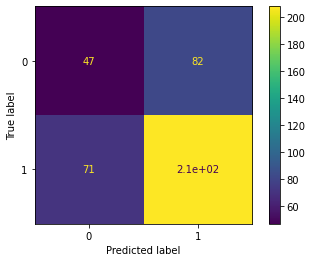

In [152]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
MRPC_plots_folder = "plots/MRPC/"
cm = confusion_matrix(y_val, y_pred, labels=baseline_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=baseline_classifier.classes_)
disp.plot()


disp.figure_.savefig(MRPC_plots_folder+'confusion_matrix_baseline.eps',transparent=True)

### Step3 : Trying to improve the baselines with various curious ways

#### Investigate the use of Grid search for RF classifier 

In [166]:
## using the gridSearch - for RF classifier , not the vectorizer, on the Train Set !!! 

from sklearn.model_selection import GridSearchCV
param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None,2,4,6,8,10,12],
    # 'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3]
}
print(param_grid)

grid = GridSearchCV(baseline_classifier, param_grid, cv=5, scoring= 'accuracy', n_jobs=-1,verbose=1 )
# vectorizer = TfidfVectorizer()
#X_train = vectorizer.fit_transform(train_cola_data['Sentence']) 
grid.fit(X_train, y_train)

#affichage 
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# predict with the best parameteres 
# X_val = vectorizer.transform() # apply the vectorizer
y_RF_best = grid.predict(X_val)  

# print(classification_report(y_val, y_RF_best))
RF_best_accuracy,RF_best_score, RF_best_score_class_1=baseline_compare(y_val, y_RF_best)


{'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 4, 6, 8, 10, 12], 'min_samples_leaf': [1, 2, 3]}
Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.1s


0.6965596202385775
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}

              precision    recall  f1-score   support

           0       0.42      0.06      0.11       129
           1       0.69      0.96      0.80       279

    accuracy                           0.68       408
   macro avg       0.55      0.51      0.46       408
weighted avg       0.60      0.68      0.58       408

Accuracy score:	 0.6764705882352942
F1 score (c#1):	 0.8023952095808384
F1 score (avg):	 0.4552516588444733
matthews_corrcoef:	 0.0498473399572349
Comparaison:
		Accuracy	F1-score	F1-score class 1
Baseline:	0.6250		0.5558		0.7311
New:		0.6765		0.4553		0.8024
Improvement of 5.15 in accuracy compared to the baseline.
Improvement of -10.06 in f1_score compared to the baseline.
Improvement of 7.13 in f1_score_class_1 compared to the baseline.


[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   32.5s finished


In [167]:
from sklearn.metrics import make_scorer
f1_scorer = make_scorer(f1_score,average='macro')

## using the gridSearch - for RF classifier , not the vectorizer, on the Train Set !!! 

print(param_grid)
grid = GridSearchCV(baseline_classifier, param_grid, cv=5, scoring = f1_scorer,n_jobs=-1,verbose=1 )
grid.fit(X_train, y_train)

#affichage 
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

# predict with the best parameteres 
# X_val = vectorizer.transform() # apply the vectorizer
y_RF_best = grid.predict(X_val) 

RF_best_accuracy,RF_best_score, RF_best_score_class_1=baseline_compare(y_val, y_RF_best)

{'criterion': ['gini', 'entropy'], 'max_depth': [None, 2, 4, 6, 8, 10, 12], 'min_samples_leaf': [1, 2, 3]}
Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 210 out of 210 | elapsed:   31.5s finished


0.5716865059482369
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1}

              precision    recall  f1-score   support

           0       0.40      0.36      0.38       129
           1       0.72      0.75      0.73       279

    accuracy                           0.62       408
   macro avg       0.56      0.55      0.56       408
weighted avg       0.62      0.62      0.62       408

Accuracy score:	 0.625
F1 score (c#1):	 0.7311072056239015
F1 score (avg):	 0.5558370036216673
matthews_corrcoef:	 0.11266777182879181
Comparaison:
		Accuracy	F1-score	F1-score class 1
Baseline:	0.6250		0.5558		0.7311
New:		0.6250		0.5558		0.7311
Improvement of 0.00 in accuracy compared to the baseline.
Improvement of 0.00 in f1_score compared to the baseline.
Improvement of 0.00 in f1_score_class_1 compared to the baseline.


#### Impact of changing hyper-parmeters of the baseline



In [168]:
# No need to run this again !!!!!
def train_save_predict(vectorizer, classifer, vectorizer_name, classifier_name, vec_meta_parameters_name, clf_meta_parameters_name):
    
    classifer.fit(X_train, y_train)

    # dump the vectorizer and the model (for use at test time)
    dump(vectorizer, MRPC_models_folder + vectorizer_name )
    dump(classifier, MRPC_models_folder + classifier_name) 

    # load model + vec
    tf_idf_vectorizer = load(MRPC_models_folder + vectorizer_name)
    RF_classifier = load(MRPC_models_folder+classifier_name)

    # predict with the model
    # X_test = tf_idf_vectorizer.transform(dev_cola_data['Sentence']) # apply the vectorizer
    y_RF = RF_classifier.predict(X_val) # run the classifier
    y_RF_preds_test = RF_classifier.predict(X_test) # run the classifier

    # output and save  the prediction
    out = MRPC_output_folder+'RF_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+".out"
    pickle.dump([RF_classifier.classes_, y_RF], open(out, 'wb'))




###### Step 1 :  try different meta-parameters and save them in different files.


# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 

analyzers = ['word', 'char', 'char_wb'] # default is word
ngram_ranges = [(1,1), (1, 2), (2,2)] #unigram or bigram  / bigram only /(default is unigram) (1,1)

# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
min_dfs = [0.01, 0.05 ,1.0 ] #  default=1 (does not ignore), ignore terms that appear in less than 1% of the documents". % too infrequenct
max_dfs = [1.0, 0.8 , 0.9 ] # default=1.0 (does not ignore), ignore terms that appear in more than 80% of the documents" % too frequent

# # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 
# solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # , default=’lbfgs’
# C_values =[0.5 ,1, 1.5]  # default=1.0
# class_weights = ['balanced', None] # default=None

param_grid = { 
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None,2,4,6,8,10,12],
    # 'min_samples_split': [2,3,4],
    'min_samples_leaf': [1,2,3]
}

for analyzer in analyzers:
  for ngram_range in ngram_ranges:
    for min_df in min_dfs:
      for max_df in max_dfs:
          print(max_df, min_df)
          if max_df <= min_df: # we remove impossible combinations
            pass
          else:
            for min_samples_leaf in param_grid['min_samples_leaf']: 
              for max_depth in param_grid['max_depth']:
                  for criterion in param_grid['criterion']:
                    # a number of options can control a vectorizer, I reckon you investigate them
                    vectorizer = TfidfVectorizer(analyzer=analyzer, min_df=min_df,
                                                max_df=max_df,
                                                ngram_range=ngram_range)
                    
                    vec_meta_parameters_name = '_analyzer='+str(analyzer)+'_ngram_range='+str(ngram_range)+'_max_df='+str(max_df)+'_min_df='+str(min_df)
                    vectorizer_name = 'tf-idf_vectorizer'+vec_meta_parameters_name+'.vec'

                    classifier = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,min_samples_leaf=min_samples_leaf)
                    clf_meta_parameters_name = '_criterion='+str(criterion)+'_max_deptht='+ str(max_depth)+'_min_samples_leaf='+str(min_samples_leaf)

                    classifier_name = 'RF_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+'.clf'
                    print(classifier_name)
                    try:
                      train_save_predict(vectorizer, classifier, vectorizer_name, classifier_name, vec_meta_parameters_name, clf_meta_parameters_name )
                    except ValueError as err:
                      print(err)



1.0 0.01
RF_classifier_criterion=gini_max_deptht=None_min_samples_leaf=1_tf-idf_vectorizer_analyzer=word_ngram_range=(1, 1)_max_df=1.0_min_df=0.01.clf
RF_classifier_criterion=entropy_max_deptht=None_min_samples_leaf=1_tf-idf_vectorizer_analyzer=word_ngram_range=(1, 1)_max_df=1.0_min_df=0.01.clf
RF_classifier_criterion=gini_max_deptht=2_min_samples_leaf=1_tf-idf_vectorizer_analyzer=word_ngram_range=(1, 1)_max_df=1.0_min_df=0.01.clf
RF_classifier_criterion=entropy_max_deptht=2_min_samples_leaf=1_tf-idf_vectorizer_analyzer=word_ngram_range=(1, 1)_max_df=1.0_min_df=0.01.clf
RF_classifier_criterion=gini_max_deptht=4_min_samples_leaf=1_tf-idf_vectorizer_analyzer=word_ngram_range=(1, 1)_max_df=1.0_min_df=0.01.clf
RF_classifier_criterion=entropy_max_deptht=4_min_samples_leaf=1_tf-idf_vectorizer_analyzer=word_ngram_range=(1, 1)_max_df=1.0_min_df=0.01.clf
RF_classifier_criterion=gini_max_deptht=6_min_samples_leaf=1_tf-idf_vectorizer_analyzer=word_ngram_range=(1, 1)_max_df=1.0_min_df=0.01.clf
RF_

In [263]:
###### Step 2: get the output files saved and calculate the evaluation metrics of all of them


# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 
analyzers = ['word', 'char', 'char_wb'] # default is word
ngram_ranges = [(1,1), (1, 2), (2,2)] #unigram or bigram  / bigram only /(default is unigram) (1,1)

# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
min_dfs = [0.01, 0.05 ,1.0 ] #  default=1 (does not ignore), ignore terms that appear in less than 1% of the documents". % too infrequenct
max_dfs = [1.0, 0.8 , 0.9 ] # default=1.0 (does not ignore), ignore terms that appear in more than 80% of the documents" % too frequent

mccs= []

accuracy_scores = []
f1_scores = []
f1_scores_c1 = []

vect_parameters = []
clsf_parameters = []

for analyzer in analyzers:
  for ngram_range in ngram_ranges:
    for min_df in min_dfs:
      for max_df in max_dfs:
          if max_df <= min_df: # we remove impossible combinations
            pass
          else:
            for min_samples_leaf in param_grid['min_samples_leaf']: 
              for max_depth in param_grid['max_depth']:
                  for criterion in param_grid['criterion']:
                    # vectorizer_name = 'tf-idf_vectorizer'+vec_meta_parameters_name+'.vec'
                    # classifier_name = 'RF_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+'.clf'

                   vec_meta_parameters_name = '_analyzer='+str(analyzer)+'_ngram_range='+str(ngram_range)+'_max_df='+str(max_df)+'_min_df='+str(min_df)
                   clf_meta_parameters_name = '_criterion='+str(criterion)+'_max_deptht='+ str(max_depth)+'_min_samples_leaf='+str(min_samples_leaf)
                   filename = MRPC_output_folder+'RF_classifier'+clf_meta_parameters_name+'_'+'tf-idf_vectorizer'+vec_meta_parameters_name+".out"
                   if os.path.isfile(filename): #is file exists
                      #open and read picle file to get predictions 
                      [ _ , y_RF_t ] = pickle.load( open(filename, 'rb'))

                      #compare and evaluate the predictions
                      #print(filename)
                      #print(classification_report(dev_cola_data['Acceptability judgment label'], y_RF))

                      vect_params={'analyzer':analyzer, 'ngram_range': ngram_range, 'min_df':min_df, 'max_df':max_df}
                      # '_criterion='+str(criterion)+'_max_deptht='+ str(_max_deptht)+'_min_samples_leaf='+str(min_samples_leaf)
                      clsf_params={'criterion':criterion, 'max_depth':max_depth, 'min_samples_leaf':min_samples_leaf}

                      accuracy_scores.append( accuracy_score(y_val, y_RF_t)  )
                      f1_scores.append( f1_score(y_val,y_RF_t,average='macro') )
                      f1_scores_c1.append( f1_score(y_val,y_RF_t) )
                      mccs.append(matthews_corrcoef(y_val,y_RF_t))

                      vect_parameters.append(vect_params)
                      clsf_parameters.append(clsf_params)


print(accuracy_scores)
print(f1_scores)
print(baseline_accuracy, baseline_f1_score)

d =  {'vectorizer parameters': vect_parameters, 'classifier parameters': clsf_parameters, 'Accuracy score': accuracy_scores, 'F1 score' : f1_scores, 'F1 score C1' : f1_scores_c1, 'MCC':mccs }
df = pd.DataFrame(data=d)
df.sort_values('Accuracy score', ascending=False)

[0.6053921568627451, 0.6274509803921569, 0.6764705882352942, 0.6764705882352942, 0.6666666666666666, 0.6715686274509803, 0.6764705882352942, 0.678921568627451, 0.678921568627451, 0.6666666666666666, 0.6715686274509803, 0.6740196078431373, 0.6666666666666666, 0.6764705882352942, 0.6004901960784313, 0.6348039215686274, 0.6764705882352942, 0.6764705882352942, 0.6666666666666666, 0.6715686274509803, 0.6691176470588235, 0.6715686274509803, 0.6764705882352942, 0.678921568627451, 0.6740196078431373, 0.6740196078431373, 0.6691176470588235, 0.678921568627451, 0.5833333333333334, 0.6102941176470589, 0.6764705882352942, 0.6764705882352942, 0.6666666666666666, 0.6715686274509803, 0.6715686274509803, 0.6838235294117647, 0.6666666666666666, 0.6715686274509803, 0.6666666666666666, 0.6838235294117647, 0.6519607843137255, 0.678921568627451, 0.6029411764705882, 0.6397058823529411, 0.6764705882352942, 0.6764705882352942, 0.6666666666666666, 0.6715686274509803, 0.6715686274509803, 0.678921568627451, 0.671

,vectorizer parameters,classifier parameters,Accuracy score,F1 score,F1 score C1,MCC
585,"{'analyzer': 'word', 'ngram_range': (2, 2), 'm...","{'criterion': 'entropy', 'max_depth': 10, 'min...",0.688725,0.508643,0.806107,0.134937
1215,"{'analyzer': 'char', 'ngram_range': (1, 2), 'm...","{'criterion': 'entropy', 'max_depth': 10, 'min...",0.688725,0.508643,0.806107,0.134937
795,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'criterion': 'entropy', 'max_depth': 10, 'min...",0.688725,0.513186,0.805513,0.138269
849,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.686275,0.507079,0.804281,0.126941
487,"{'analyzer': 'word', 'ngram_range': (1, 2), 'm...","{'criterion': 'entropy', 'max_depth': 10, 'min...",0.686275,0.502439,0.804878,0.123311
...,...,...,...,...,...,...
1862,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'criterion': 'gini', 'max_depth': None, 'min_...",0.558824,0.489872,0.677419,-0.020255
1288,"{'analyzer': 'char', 'ngram_range': (2, 2), 'm...","{'criterion': 'gini', 'max_depth': None, 'min_...",0.556373,0.485964,0.676208,-0.028066
2002,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'criterion': 'gini', 'max_depth': None, 'min_...",0.551471,0.463771,0.680628,-0.071002
700,"{'analyzer': 'word', 'ngram_range': (2, 2), 'm...","{'criterion': 'gini', 'max_depth': None, 'min_...",0.551471,0.471154,0.677249,-0.057162


In [264]:
best_accuracy_score=df.sort_values('Accuracy score', ascending=False)['Accuracy score'].iloc[0]

print('Best Improvement = {:0.2f} in accuracy compared to the baseline.'.format( 100 * (best_accuracy_score - baseline_accuracy) ))


Best Improvement = 6.37 in accuracy compared to the baseline.


In [265]:
print('Corressponding Classifier parameters', )
df.sort_values('Accuracy score', ascending=False)['classifier parameters'].iloc[0]


Corressponding Classifier parameters


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 3}

In [266]:
print('Corressponding vectorizer parameters', )
df.sort_values('Accuracy score', ascending=False)['vectorizer parameters'].iloc[0]

Corressponding vectorizer parameters


{'analyzer': 'word', 'max_df': 0.8, 'min_df': 0.01, 'ngram_range': (2, 2)}

In [267]:
df.sort_values('F1 score', ascending=False)

,vectorizer parameters,classifier parameters,Accuracy score,F1 score,F1 score C1,MCC
127,"{'analyzer': 'word', 'ngram_range': (1, 1), 'm...","{'criterion': 'entropy', 'max_depth': None, 'm...",0.669118,0.576252,0.774624,0.168867
841,"{'analyzer': 'char', 'ngram_range': (1, 1), 'm...","{'criterion': 'entropy', 'max_depth': None, 'm...",0.664216,0.572474,0.770519,0.159466
1989,"{'analyzer': 'char_wb', 'ngram_range': (1, 2),...","{'criterion': 'entropy', 'max_depth': None, 'm...",0.644608,0.571003,0.748700,0.145161
365,"{'analyzer': 'word', 'ngram_range': (1, 2), 'm...","{'criterion': 'entropy', 'max_depth': None, 'm...",0.647059,0.570777,0.751724,0.145830
743,"{'analyzer': 'word', 'ngram_range': (2, 2), 'm...","{'criterion': 'entropy', 'max_depth': None, 'm...",0.642157,0.564816,0.748276,0.133846
...,...,...,...,...,...,...
1491,"{'analyzer': 'char', 'ngram_range': (2, 2), 'm...","{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.671569,0.428762,0.801187,-0.003310
147,"{'analyzer': 'word', 'ngram_range': (1, 1), 'm...","{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.669118,0.427675,0.799406,-0.012349
1407,"{'analyzer': 'char', 'ngram_range': (2, 2), 'm...","{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.669118,0.427675,0.799406,-0.012349
1183,"{'analyzer': 'char', 'ngram_range': (1, 2), 'm...","{'criterion': 'entropy', 'max_depth': 6, 'min_...",0.669118,0.427675,0.799406,-0.012349


In [268]:
best_f1_score=df.sort_values('F1 score', ascending=False)['F1 score'].iloc[0]

print('Best Improvement = {:0.2f} in F1 score compared to the baseline.'.format( 100 * (best_f1_score - baseline_f1_score) ))

Best Improvement = 2.04 in F1 score compared to the baseline.


In [269]:
print('Corressponding classifier parameters', )
df.sort_values('F1 score', ascending=False)['classifier parameters'].iloc[0]

Corressponding classifier parameters


{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1}

In [270]:
print('Corressponding vectorizer parameters', )
df.sort_values('F1 score', ascending=False)['vectorizer parameters'].iloc[0]

Corressponding vectorizer parameters


{'analyzer': 'word', 'max_df': 1.0, 'min_df': 0.05, 'ngram_range': (1, 1)}

### Step 4 : Investigation of pre-processing on training data

In [177]:
pip install clean-text


     |████████████████████████████████| 170 kB 9.6 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=316eaae334c5085357455da91d98fc13ef8be2e67f780ef261be91f793678b12
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=19cc7fc87e63df3a4bdb068d8419d5c37978944b505916e79dae6a6fd33f5ca2
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built ftfy emoji


In [197]:
from cleantext import clean
from nltk.stem import 	WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import nltk
nltk.download('wordnet')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [185]:
" ".join([wordnet_lemmatizer.lemmatize(t) for t in clean('Successfully installed clean').split()])

'successfully installed clean'

In [248]:
df_train = MRPC_train
df_val = MRPC_val

wordnet_lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stopwords_english = stopwords.words('english')
# fix_unicode=True, to_ascii=True, lower=True, normalize_whitespace=True
# stemming  + lemmatization
# https://pypi.org/project/clean-text/
def preprocess(df,s):
  if s == 1:
    return df.apply(lambda row: " ".join([wordnet_lemmatizer.lemmatize(stemmer.stem(t)) for t in clean(row.sentence1).split()]), axis=1)
  elif s==2:
    return df.apply(lambda row: " ".join([wordnet_lemmatizer.lemmatize(stemmer.stem(t)) for t in clean(row.sentence2).split()]), axis=1)
df_train['sent1_pre'] = preprocess(df_train,1)
df_train['sent2_pre'] = preprocess(df_train,2)

In [249]:
df_train

,sentence1,sentence2,label,idx,sent1_pre,sent2_pre
0,"Amrozi accused his brother , whom he called "" ...","Referring to him as only "" the witness "" , Amr...",1,0,"amrozi accus hi brother , whom he call "" the w...","refer to him a onli "" the wit "" , amrozi accus..."
1,Yucaipa owned Dominick 's before selling the c...,Yucaipa bought Dominick 's in 1995 for $ 693 m...,0,1,yucaipa own dominick 's befor sell the chain t...,yucaipa bought dominick 's in 1995 for $ 693 m...
2,They had published an advertisement on the Int...,"On June 10 , the ship 's owners had published ...",1,2,they had publish an advertis on the internet o...,"on june 10 , the ship 's owner had publish an ..."
3,"Around 0335 GMT , Tab shares were up 19 cents ...","Tab shares jumped 20 cents , or 4.6 % , to set...",0,3,"around 0335 gmt , tab share were up 19 cent , ...","tab share jump 20 cent , or 4.6 % , to set a r..."
4,"The stock rose $ 2.11 , or about 11 percent , ...",PG & E Corp. shares jumped $ 1.63 or 8 percent...,1,4,"the stock rose $ 2.11 , or about 11 percent , ...",pg & e corp. share jump $ 1.63 or 8 percent to...
...,...,...,...,...,...,...
3663,""" At this point , Mr. Brando announced : ' Som...","Brando said that "" somebody ought to put a bul...",1,4071,""" at thi point , mr. brando announc : ' somebo...","brando said that "" somebodi ought to put a bul..."
3664,"Martin , 58 , will be freed today after servin...",Martin served two thirds of a five-year senten...,0,4072,"martin , 58 , will be freed today after serv t...",martin serv two third of a five-year sentenc f...
3665,""" We have concluded that the outlook for price...","In a statement , the ECB said the outlook for ...",1,4073,""" we have conclud that the outlook for price s...","in a statement , the ecb said the outlook for ..."
3666,The notification was first reported Friday by ...,MSNBC.com first reported the CIA request on Fr...,1,4074,the notif wa first report friday by msnbc .,msnbc.com first report the cia request on frid...


In [250]:
df_val['sent1_pre'] = preprocess(df_val,1)
df_val['sent2_pre'] = preprocess(df_val,2)

In [251]:
vectorizer = TfidfVectorizer()
MRPC_train_pairs_pre =  list(zip(df_train['sent1_pre'],df_train['sent2_pre']))
MRPC_val_pairs_pre =  list(zip(df_val['sent1_pre'],df_val['sent2_pre']))
# X_train = vectorizer.fit_transform(MRPC_train_pairs) 
X_train_p = vectorizer.fit_transform(assemble_sentences(MRPC_train_pairs_pre))
y_train_p = MRPC_train['label']

X_val_p = vectorizer.transform(assemble_sentences(MRPC_val_pairs_pre))
y_val_p = MRPC_val['label']


In [252]:
# RF = RandomForestClassifier(criterion='entropy', max_depth=7, max_features='auto', n_estimators=500)
RF_classifier_pr = DecisionTreeClassifier(random_state=42)
RF_classifier_pr.fit(X_train_p, y_train_p)

y_pred = RF_classifier_pr.predict(X_val_p) # run the classifier

cr =  evaluate(y_val_p, y_pred)

baseline_compare(y_val_p, y_pred)


              precision    recall  f1-score   support

           0       0.45      0.40      0.43       129
           1       0.74      0.77      0.76       279

    accuracy                           0.66       408
   macro avg       0.59      0.59      0.59       408
weighted avg       0.65      0.66      0.65       408

Accuracy score:	 0.6568627450980392
F1 score (c#1):	 0.7552447552447552
F1 score (avg):	 0.5907371317207383
matthews_corrcoef:	 0.18323526368290285

              precision    recall  f1-score   support

           0       0.45      0.40      0.43       129
           1       0.74      0.77      0.76       279

    accuracy                           0.66       408
   macro avg       0.59      0.59      0.59       408
weighted avg       0.65      0.66      0.65       408

Accuracy score:	 0.6568627450980392
F1 score (c#1):	 0.7552447552447552
F1 score (avg):	 0.5907371317207383
matthews_corrcoef:	 0.18323526368290285
Comparaison:
		Accuracy	F1-score	F1-score class 

(0.6568627450980392, 0.5907371317207383, 0.7552447552447552)

### Step X : Investigation of  Edit Distance

#### : Edit Distance :

In [102]:
! pip install textdistance

In [57]:
import textdistance

In [137]:
dist = {
        'Jaro_Winkler' : textdistance.jaro_winkler.distance,
        'Levenshtein' : textdistance.levenshtein.distance,
        'Jaccard': textdistance.jaccard.distance,
        'Cosine': textdistance.cosine.distance,
        'Hamming': textdistance.hamming.distance,
        'LCSS': textdistance.lcsstr.distance,
        'Damerau_Levenshtein': textdistance.damerau_levenshtein.distance,
        'Needleman_Wunsch': textdistance.needleman_wunsch.distance
                 }
dist.keys()

MRPC_train = pd.DataFrame( MRPC['train'])
df_plot_train['set'] = 'Train Set'

MRPC_val = pd.DataFrame( MRPC['validation'])
df_plot_dev['set'] = 'Val. set'

MRPC_test = pd.DataFrame( MRPC['test'])
df_plot_test['set'] = 'Test set'

df_plot = df_plot_train.append(df_plot_dev)
df_plot = df_plot.append(df_plot_test)

In [138]:
def calculate_distance(pairs,distance):
    return [distance(t[0],t[1]) for t in pairs]
df_distances = pd.DataFrame( MRPC['train'])
for d in ['Jaro_Winkler', 'Jaccard', 'Cosine', 'Hamming', 'LCSS']:
    distance = dist[d]
    df_distances[d] = df_distances.apply(lambda row: distance(row.sentence1,row.sentence2) , axis=1)


In [ ]:
# ! pip install -U kaleido

In [ ]:
# !pip install plotly>=4.0.0
# !wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
# !chmod +x /usr/local/bin/orca
# !apt-get install xvfb libgtk2.0-0 libgconf-2-4

In [139]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


r=0,
c=0,
distances = ['Jaro_Winkler', 'Hamming','Jaccard', 'Cosine' ]
# df_distances["label"] = df_distances["label"].astype(str)

fig = make_subplots(rows=1, cols=4,subplot_titles=distances)
# rc= [(1,1),(1,2),(2,1),(2,2)]
for i,d in enumerate(distances):
    r,c=1,i+1 #rc[i]
    fig.add_trace(go.Violin(x=df_distances['label'],y=df_distances[d],name=d,box_visible=True,meanline_visible=True,legendgroup=1),row=r,col=c)

fig.update_xaxes(title_text="Label")
fig.update_yaxes(title_text="Distance",row=1,col=1)
fig.update_layout(height=500, width=800, title_text="Distibution of labels w.r.t. distances between sentence pairs")
# fig.write_image(MRPC_plots_folder+"distances.pdf")
fig.show()

In [140]:
threshold_cosine = (0.1850575+0.129918)/2 # (median label 1 + median label 2) / 2
threshold_jaccard = (0.3210443+0.2343842)/2 # (median label 1 + median label 2) / 2
model_cosine = {
    'distance':'Cosine',
    'threshold':threshold_cosine 
    }
model_jaccard = {
    'distance':'Jaccard',
    'threshold':threshold_jaccard 
    }

def predict(df,model):
  distance = dist[model['distance']]
  thresh = model['threshold']
  return list(df.apply(lambda row: 1 if distance(row.sentence1,row.sentence2) < thresh else 0 , axis=1))


#### Evaluation

In [141]:
# X_train_d = MRPC_train
y_train_d = MRPC_train['label']
y_train_pred = predict(MRPC_train,model_cosine)

# X_val_d = MRPC_val
y_val = MRPC_val['label']
y_val_pred = predict(MRPC_val,model_cosine)

# X_test_d = MRPC_test
y_test = MRPC_test['label']
y_test_pred = predict(MRPC_test,model_cosine)

cr_train = evaluate(y_train_d, y_train_pred,title='\nTrain Cosine')
cr_val = evaluate(y_val, y_val_pred,title='\nValidation Cosine')
baseline_compare(y_val, y_val_pred)

cr_test = evaluate(y_test, y_test_pred,title='\nTest Cosine')



Train Cosine
              precision    recall  f1-score   support

           0       0.51      0.69      0.59      1194
           1       0.82      0.69      0.75      2474

    accuracy                           0.69      3668
   macro avg       0.67      0.69      0.67      3668
weighted avg       0.72      0.69      0.70      3668

Accuracy score:	 0.6875681570338059
F1 score (c#1):	 0.747465843984134
F1 score (avg):	 0.6689437868955694
matthews_corrcoef:	 0.3564157457605509

Validation Cosine
              precision    recall  f1-score   support

           0       0.54      0.71      0.62       129
           1       0.84      0.72      0.78       279

    accuracy                           0.72       408
   macro avg       0.69      0.72      0.70       408
weighted avg       0.75      0.72      0.73       408

Accuracy score:	 0.7181372549019608
F1 score (c#1):	 0.7775628626692458
F1 score (avg):	 0.6964737390269307
matthews_corrcoef:	 0.40896082342434326

              prec

In [142]:
# X_train_d = MRPC_train
y_train_d = MRPC_train
y_train_pred = predict(MRPC_train,model_jaccard)

# X_val_d = MRPC_val
y_val = MRPC_val['label']
y_val_pred = predict(MRPC_val,model_jaccard)

# X_test_d = MRPC_test
y_test = MRPC_test['label']
y_test_pred = predict(MRPC_test,model_jaccard)

cr_val = evaluate(y_val, y_val_pred,title='\nValidation Jaccard')
baseline_compare(y_val, y_val_pred)

cr_test = evaluate(y_test, y_test_pred,title='\nTest Jaccard')
# f1-score = cr['macro avg']['f1-score']
# accuracy = cr['accuracy'] 


Validation Jaccard
              precision    recall  f1-score   support

           0       0.54      0.74      0.63       129
           1       0.86      0.71      0.77       279

    accuracy                           0.72       408
   macro avg       0.70      0.73      0.70       408
weighted avg       0.76      0.72      0.73       408

Accuracy score:	 0.7181372549019608
F1 score (c#1):	 0.7740667976424361
F1 score (avg):	 0.6997369818831073
matthews_corrcoef:	 0.42218709940721355

              precision    recall  f1-score   support

           0       0.54      0.74      0.63       129
           1       0.86      0.71      0.77       279

    accuracy                           0.72       408
   macro avg       0.70      0.73      0.70       408
weighted avg       0.76      0.72      0.73       408

Accuracy score:	 0.7181372549019608
F1 score (c#1):	 0.7740667976424361
F1 score (avg):	 0.6997369818831073
matthews_corrcoef:	 0.42218709940721355
Comparaison:
		Accuracy	F1-sc

In [ ]:
# different scoring metrics :  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter 

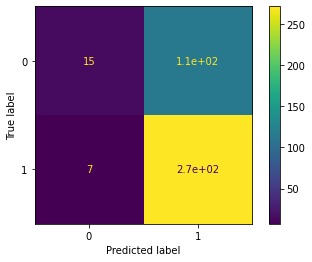

In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix
# MRPC_plots_folder = "plots/MRPC/"
# cm = confusion_matrix(y_val, y_pred, labels=baseline_classifier.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                                display_labels=baseline_classifier.classes_)
# disp.plot()


# disp.figure_.savefig(MRPC_plots_folder+'confusion_matrix_distance.eps',transparent=True)

### Step5: Neat Analysis of the chosen system ( including creating new data ) 

#### Creating new data

In [ ]:
# new sentences 

import pandas as pd
from pandas import Series

#todo: make sure these do not appear in the tes/dev cola sets


# test new data 
all_test_sentences = []
all_test_labels = []



############## Grammar Weaknesses

# Q 1 : Can the model differente between  pronouns, who, whom,  whose ? ---> NO
test1 =   ["Who are you?", "Whom are you?", "Whose are you?" , "The people who just left are rude", "The people whom just left are rude",  "The people whose just left are rude" ]
labels1 = [ 1            , 0              , 0                ,1                                  , 0                                   , 0 ]

all_test_sentences.extend(test1)
all_test_labels.extend(labels1)


# Q 2 : Does the model think that, if a sentence contains several pronounms, it is wrong ? --->NO
# test2 =   ["They gave us money to take their friend, whose car is broken because of me, to our show", # 6 pronouns
#            "They think that we owe them because our son ruined their party with his bad speech" # 6 pronoums 
#             ]
# labels2 = [ 1,
#            1 
#            ]
#
# all_test_sentences.extend(test2)
# all_test_labels.extend(labels2)


# Q 3 : Does the model think that, if a sentence is long, it is correct ? ---> YES
test3 = ['I have a big sister who loves her ten cats so much that she spends a lot of money monthly to provide expensive food and  milk for they.', 
         'I wanted to come to the party last weekend, but I did not go because I had a lot of important work that needed to be doing before monday.' , 
         'Two months ago, I watched a very good movies about the bad effects of social media on young adults and especially on teenagers.',
          'I do not remember the last time I went for a long walk with my mother and my two beautiful sisters in the big garden of  lovely house.'
      ]

labels3 = [ 0,
           0 ,
          0,
           0]

all_test_sentences.extend(test3)
all_test_labels.extend(labels3)


# Q 4 : Does the model think that, if a sentence is short, it is incorrect ? ---> NO
test4 =   ['It hurts.', "It's raining." , "You suck." , "Run!" , "You us.", "Alex loves." , "I dog."]
labels4 = [ 1,         1                , 1           , 1       , 0       ,  0            ,   0 ]

all_test_sentences.extend(test4)
all_test_labels.extend(labels4)


# Q 5: Can the model differentiate between subject and object pronouns?  -------> NOt very well
# https://www.englishgrammar101.com/module-2/pronouns/lesson-3/challenging-uses-of-cases 

test5 = ['Jesse and me went to school.', 'Jesse and I went to school.', 'He bought a puppy.',	'Him bought a puppy.', 'She took the bus.',	'Her took the bus.' , 'We like shopping.', 'Us like shopping.']
labels5=[0 ,                             1                           , 1                             ,  0             , 1                 , 0                 ,   1                 , 0 ]

all_test_sentences.extend(test5)
all_test_labels.extend(labels5)


# Q 6: can the model differentiate comparative and superalative -------> NO
test6 = ['Alex is taller than me.', 'Alex is tallest than me.', 'Robin is the shortest.',	'Robin is the shorter.']
labels6=[1                        ,0                          , 1                       ,  0 ]

all_test_sentences.extend(test6)
all_test_labels.extend(labels6)


# Q 7: can the model detect when use plural/vs singular -------> YES
test7 = ['I have five cats.', 'I have five cat.', 'You ate several apples.',	'You ate several apple.', 'I have a car.', 'I have a cars.']
labels7=[1                 ,0                  , 1                       ,   0                        , 1              , 0 ]

all_test_sentences.extend(test7)
all_test_labels.extend(labels7)


# Q 8: can the model detect the nouns that do not have plurials -------> Not all of them
test8 = ['I have a lot of money.', 'I have a lot of moneys.', 'They have good education',	'They have good educations', 'Steven gave me some good advice.', 'Steven gave me some good advices.' ]
labels8=[1                       ,0                        , 1                         ,   0                        , 1                                 , 0 ]

all_test_sentences.extend(test8)
all_test_labels.extend(labels8)


# Q 9: can the model differentiate between your and you are ?  -------> YES
test9 = ['You are nice.', 'Your nice.', 'Your car is expensive.',	'You are car is expensive' ]
labels9=[1              ,0           , 1                  , 0 ]

all_test_sentences.extend(test9)
all_test_labels.extend(labels9)


############## Punctuation Weaknesses

# Q 10: Can the model understand when a question mark should be used  ? --->  NO 
test10 =   [ "Who are you?",  "Who are you." , "Where are you going?" , "Where are you going." , "What time is it?", "What time is it."]  
labels10 = [ 1             , 0               , 1                      , 0                       ,1                 , 0 ] 

all_test_sentences.extend(test10)
all_test_labels.extend(labels10)


# Q 11: Can the model understand when an exclamation mark should be used  ? --->   NO
test11=   [ "What a beautiful view!",  "What a beautiful view." , "What large hands you have!" , "What large hands you have."]  
labels11 = [ 1                       , 0                         , 1                            , 0                          ] 

all_test_sentences.extend(test11)
all_test_labels.extend(labels11)

############## 


test_sentences_for_bert = pd.Series(all_test_sentences)
test_labels_for_bert = pd.Series(all_test_labels)

#### Testing the new data

In [ ]:
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification
import numpy as np
from sklearn.metrics import classification_report, balanced_accuracy_score, average_precision_score, f1_score
import torch


#load the model
# Load a trained model and vocabulary that you have fine-tuned
model = BertForSequenceClassification.from_pretrained(COLA_models_folder)
tokenizer = BertTokenizer.from_pretrained(COLA_models_folder, do_lower_case=False)

# Copy the model to the GPU. <---------------GPU
#model.to(device)


# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for sent in test_sentences_for_bert:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels_for_bert)

# Set the batch size.  
batch_size = 32  

# Create the DataLoader.
prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

# Prediction on manually created test set

print('Predicting labels for {:,} the manually created test sentences for bert...'.format(len(input_ids)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  #batch = tuple(t.to(device) for t in batch)  <---------------GPU
  batch = tuple(t for t in batch)

  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions.
      result = model(b_input_ids, 
                     token_type_ids=None, 
                     attention_mask=b_input_mask,
                     return_dict=True)

  logits = result.logits

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

print('    DONE.')

# Combine the results across all batches. 
flat_predictions = np.concatenate(predictions, axis=0)

# For each sample, pick the label (0 or 1) with the higher score.
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = np.concatenate(true_labels, axis=0)

print(len(flat_predictions), len(flat_true_labels))


d = { 'Test sentences manually created' : test_sentences_for_bert, 'True Labels' : flat_true_labels, 'Predicted Labels': flat_predictions }
df= pd.DataFrame( data = d)
df

#### Evaluating the performance

In [ ]:
len(df)

In [ ]:
len( df[  ( df['True Labels'] == df['Predicted Labels'] )   ] )

In [ ]:
from sklearn.metrics import accuracy_score
##compare and evaluate the predictions
#print(classification_report(flat_true_labels, flat_predictions))

# print('balanced accuracy score', balanced_accuracy_score(flat_true_labels, flat_predictions))
# print('f1 score of class 0', f1_score(flat_true_labels, flat_predictions, pos_label = 0))

print('accuracy score is (number of correctly classified samples)', accuracy_score(flat_true_labels, flat_predictions, normalize = False)) 
 

#### Putting the test sentences in a file with the same format as the file dev

In [ ]:
#putting the 55 sentences in a tsv file like the dev set 
code = 'test55'

test_file_name = COLA_files_folder + 'cola-kacem_khaled-mouna_dhaouadi.tsv'

with open(test_file_name,"w", encoding='utf-8') as f:
  for i in range(len(df)):
    row = df.iloc[i]  
    if int(row['True Labels']) == 1 : star = ''
    else: star = '*'
    phrase = code + '\t' + str(row['True Labels']) + '\t'  + star + '\t' + row['Test sentences manually created'] + '\n'
    f.write(phrase)

f.close()


In [ ]:
#making sure we can read it just like cola train files 

test_file_name = COLA_files_folder + 'cola-kacem_khaled-mouna_dhaouadi.tsv'
pd.read_table(test_file_name, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])

### Step6: Improving the chosen system (based on the analysis above)

#### Create More training Data

In [ ]:
#create more trainig data : who, whose, whom
new_sentences_q1 = [
                 'Who is this person?',  'Whom is this person?', 'Whose is this person?',

                 'Who are they?', 'Whom are they?', 'Whose are they?',
                 
                 'Who wrote that letter?', 'Whom wrote that letter?', 'Whose wrote that letter?',

                 'Who is the manager?', 'Whom is the manager?',  'Whose is the manager?',

                  'Who is going to prepare dinner?', 'Whom is going to prepare dinner?', 'Whose is going to prepare dinner?',

                  'Who are you going to ask to the party?','Whom are you going to ask to the party?', 'Whose are you going to ask to the party?',

                  'Whom did they choose as team captain?','Who did they choose as team captain?', 'Whose did they choose as team captain?',

                  'Whom did they summon?', 'Who did they summon?', 'Whose did they summon?',

                  'Whose phone is this?', 'Who phone is this?', 'Whom phone is this?',

                  'Whose is this umbrella?', 'Who is this umbrella?',  'Whom is this umbrella?',

                  'Whose car is blocking the drive?', 'Who car is blocking the drive?', 'Whom car is blocking the drive?'
]

new_labels_q1 = [ 
              1,  0,  0,

              1, 0, 0,

              1, 0,0,

              1,  0, 0,

              1, 0, 0,

              0,  1, 0,

              1, 0, 0,

              1, 0, 0,

              1,0, 0,

              1, 0, 0,

              1,0,0
       
]

len(new_sentences_q1), len(new_labels_q1)

In [ ]:
#create more trainig data : long incorrect phrases
new_sentences_q2 = [
                ''
                ''
                ''
                ''
                
]

new_labels_q2 = [ 
                0,
                 0,
                 0,
                 0,
                 0
       
]

len(new_sentences_q2), len(new_labels_q2)

In [ ]:
#create more trainig data : objective/subjective pronouns, examples with 'I' and 'me
new_sentences_q4 = [
                'He likes football.',
                'Him likes football.',

                'She goes to university.',
                'Her goes to university.',

                'They enjoy travelling.',
                'Them enjoy travelling.',

                'The employees respect me.',
                'The employees respect I.',

                'I know her.',
                'Me know her.',

                'The sailors waved to me.',
                'The sailors waved to I.', 

                'My family and I are going to meet John today.',
                'My family and me are going to meet John today.',

                'My cousins and I ran into Kate at the mall yesterday.',
                'My cousins and me ran into Kate at the mall yesterday.',

                'Kate waited for me and my cousins at the mall yesterday.',
                'Kate waited for I and my cousins at the mall yesterday.',

]

new_labels_q4 = [ 
                 1,
                 0,

                 1,
                 0,

                 1,
                 0,

                 1,
                 0,

                 1,
                 0,

                1,
                0,
                 
                1,
                0,
                 
                 1,
                 0,

                 1,
                 0
                            
]

len(new_sentences_q4), len(new_labels_q4)

In [ ]:
#create more trainig data : superlative/comparative 
new_sentences_q5 = [
                'My house is larger than hers.',
                'My house is largest than hers.',

                'This box is smaller than the one I lost.',
                'This box is smallest than the one I lost.',

                'Your dog runs faster than my dog.',
                'Your dog runs fastest than my dog.',

                  'The rock flew higher than the roof. ',
                  'The rock flew highest than the roof. ',
                
                'Jim and Jack are both my friends, but I like Jack better. ',
                'Jim and Jack are both my friends, but I like Jack better than Jim. ',

                'My house is the largest one in our neighborhood.',
                'My house is the larger one in our neighborhood.',

                'This is the smallest box I have ever seen.',
                'This is the smaller box I have ever seen.',

               'Your dog ran the fastest of any dog in the race.',
               'Your dog ran the faster of any dog in the race.',

                'We all threw our rocks at the same time. My rock flew the highest.',
                'We all threw our rocks at the same time. My rock flew the highest of all the rocks.'

]

new_labels_q5 = [ 1,
                 0,

                1,
                 0,

                 1,
                 0,

                 1,
                 0,

                  1,
                 1,

                1,
                 0,

                1,
                 0,

                1,
                 0,

                1,
                 1     
]
len(new_sentences_q5), len(new_labels_q5)

In [ ]:
#words without plurials, especially education + advice 
new_sentences_q7 = [
                'You have done this before, please give me your advice.', 
                'I need your advice on which car to buy.',
                'Her father gave them sound financial advice.',
                'She took my interview advice on board and got the job.',
                'Always get home improvement advice from an expert.',

                'You have done this before, please give me your advices.', 
                'I need your advices on which car to buy.',
                'Her father gave them sound financial advices.',
                'She took my interview advices on board and got the job.',
                'Always get home improvement advices from an expert.',

                'Our young people need education and more organized activities.',
                'You have the education, the experience in business and the personality.',
                'This is all that his foreign education has done for him!',

                'Our young people need educations and more organized activities.',
                'You have the educations, the experience in business and the personality.',
                'This is all that his foreign educations has done for him!',

]

new_labels_q7 = [ 
          1,
          1,
          1,
          1,
          1, 

          0,
          0,
          0,
          0,
          0,

          1,
          1,
          1,

          0,
          0,
          0
      
]

len(new_sentences_q7), len(new_labels_q7)

In [ ]:
#interrogation mark
new_sentences_q9 = [
                'What did you witness?',
                'What was the date, time and duration of the incident or behavior you witnessed?',
                'Where did it happen?',
                'Who was involved?',
                'What did each person do and say?',
                'Did anyone else see it happen?',
                'What did you do after witnessing the incident or behavior?',

                'What did you witness.',
                'What was the date, time and duration of the incident or behavior you witnessed.',
                'Where did it happen.',
                'Who was involved.',
                'What did each person do and say.',
                'Did anyone else see it happen.',
                'What did you do after witnessing the incident or behavior.',

                'Where was Jimmy standing?',
                'What did Jimmy do as you were going back there?',
                'what was Jimmy doing all this while?',

                'Where was Jimmy standing.',
                'What did Jimmy do as you were going back there.',
                'what was Jimmy doing all this while.'
]

new_labels_q9 = [ 
                 1,
                 1,
                 1,
                 1,
                 1,
                 1,
                 1,

                0,
                 0,
                 0,
                 0,
                 0,
                 0,
                 0,

                 1,
                 1,
                 1,

                 0,
                 0,
                 0
   
]    

len(new_sentences_q9), len(new_labels_q9)        

In [ ]:
#exclamation mark (phrses with what ! )
new_sentences_q10 = [
                      'What a bad influence!',
                     'What a nice surprise!',
                     'What a good idea!', 
                     'What a horrible movie!',
                     'What a delicious meal!',
                      'What a big pool!',

                        'What a bad influence.',
                     'What a nice surprise.',
                     'What a good idea.', 
                     'What a horrible movie.',
                     'What a delicious meal.',
                      'What a big pool.'
                
]

new_labels_q10 = [ 1,
                    1,
                    1,
                  1,
                  1,
                  1,

                  0,
                  0,
                  0,
                  0,
                  0,
                  0 
] 

len(new_sentences_q10), len(new_labels_q10)

In [ ]:
#put all new data together 

new_sentences_all = []
new_labels_all = []

new_sentences_all.extend(new_sentences_q1 )
new_labels_all.extend(new_labels_q1)
                 
new_sentences_all.extend(new_sentences_q2 )
new_labels_all.extend(new_labels_q2)

new_sentences_all.extend(new_sentences_q4 )
new_labels_all.extend(new_labels_q4)
               
new_sentences_all.extend(new_sentences_q5 )
new_labels_all.extend(new_labels_q5)
               
new_sentences_all.extend(new_sentences_q7 )
new_labels_all.extend(new_labels_q7)

new_sentences_all.extend(new_sentences_q9 )
new_labels_all.extend(new_labels_q9)

new_sentences_all.extend(new_sentences_q10 )
new_labels_all.extend(new_labels_q10)


new_sentences_for_bert = pd.Series(new_sentences_all)
new_labels_for_bert = pd.Series(new_labels_all) 

new_data = {'new sentence' : new_sentences_for_bert, 'true label' : new_labels_for_bert }
df_new = pd.DataFrame(data = new_data )
df_new

In [ ]:
#putting the new training sentences in a tsv file like the train set 
code = 'test??'

test_file_name = COLA_files_folder + 'cola-new-training-data-kacem_khaled-mouna_dhaouadi.tsv'

with open(test_file_name,"w", encoding='utf-8') as f:
  for i in range(len(df)):
    row = df.iloc[i]  
    if int(row['True Labels']) == 1 : star = ''
    else: star = '*'
    phrase = code + '\t' + str(row['True Labels']) + '\t'  + star + '\t' + row['Test sentences manually created'] + '\n'
    f.write(phrase)

f.close()


In [ ]:
#making sure we can read it just like cola train files 

new_data_file_name = COLA_files_folder + 'cola-new-training-data-kacem_khaled-mouna_dhaouadi.tsv'
pd.read_table(new_data_file_name, header=None, usecols=[1,3] , names = [ 'Acceptability judgment label' , 'Sentence'])

#### Re fine tune the system 

#### Save the system

In [ ]:
# todo : save the new  system

#### Test on our 55 sentences 

In [ ]:
####

### Step7 : Testing the system on new test data (later)

todo: remove averga eprecision from the notebook 

# The end.